# ALUNO

Marcos Vinícius Piaia - 27.238.140-8


# Setup Inicial

Importação da biblioteca onde os elementos estão implementados:

In [1]:
%classpath add jar ../../../lib/component-catalog-2020-08-04.jar

## Tarefa 1

Conecte o componente `DataSet` aos componentes de projeção e console para mostrar na tela as seguintes colunas: `name` e `age`.

In [4]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s30projection.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");


// criando o objeto projection
IProjection dataSetProjection = new ProjectionComponent();
dataSetProjection.setAttributes(new String[]{"name", "age"});
dataSetProjection.connect(dataset);

IConsole console = new ConsoleComponent();
// conectando o console ao 
console.connect(dataSetProjection);

console.update();

=== Attributes ===
name, age

=== Instances ===
Rot Donnadd, 43
Pid Mught, 38
Thulk Lebbimp, 63
Bouvossam Damme, 71
Pirg Zall, 48
Nullon Rackindock, 23
Shor Splitturch, 35
Ger Ackeng, 66
Gleldo Shruck, 45
Nadross Pilch, 60
Sadrent Pemmir, 73
Read Rait, 55
Dallun Whadder, 15
Eapplar Thorg, 25
Blottork Patter, 68
Darrutt Bottall, 75
Gallir Shauch, 20
Dirpe Polnay, 39
Harrimp Fottiem, 65


null

## Tarefa 2

Conecte o componente `DataSet` aos componentes de seleção e console para mostrar na tela aquelas instâncias cujo diagnóstico seja `bacterial_infection`.

In [8]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s40selection.*;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");

// criando o component de seleção
ISelection dataSetSelection = new SelectionComponent();
dataSetSelection.setAttribute(new String("diagnostic"));
dataSetSelection.setOperator(new String("="));
dataSetSelection.setValue(new String("bacterial_infection"));
dataSetSelection.connect(dataset);

// conectando ao objeto de seleção
IConsole console = new ConsoleComponent();
console.connect(dataSetSelection);

console.update();

=== Attributes ===
name, age, paralysis, yellow_tong, member_loss, chest_pain, trembling_finger, severe_anger, history_bacteria, diagnostic, days_recovery, has_disease

=== Instances ===
Rot Donnadd, 43, t, t, f, f, f, f, f, bacterial_infection, 9, t
Pid Mught, 38, f, t, f, f, f, f, f, bacterial_infection, 7, t
Gleldo Shruck, 45, f, t, f, t, f, f, f, bacterial_infection, 8, t
Read Rait, 55, t, t, f, f, f, f, f, bacterial_infection, 9, t
Dirpe Polnay, 39, f, t, f, f, f, f, f, bacterial_infection, 7, t


null

## Tarefa 3

Conecte os componentes que você achar necessários para mostrar no console as colunas `name` e `age` de zumbis com `bacterial_infection`.

In [10]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s20console.*;
import pt.c08componentes.s20catalog.s40selection.*;
import pt.c08componentes.s20catalog.s30projection.*;


IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");

// criando o component de seleção
ISelection dataSetSelection = new SelectionComponent();
dataSetSelection.setAttribute(new String("diagnostic"));
dataSetSelection.setOperator(new String("="));
dataSetSelection.setValue(new String("bacterial_infection"));
dataSetSelection.connect(dataset);

// criando o componente de projeção
IProjection dataSetProjection = new ProjectionComponent();
dataSetProjection.setAttributes(new String[]{"name", "age"});
dataSetProjection.connect(dataSetSelection);

// conectando ao objeto de seleção
IConsole console = new ConsoleComponent();
console.connect(dataSetProjection);

console.update();



=== Attributes ===
name, age

=== Instances ===
Rot Donnadd, 43
Pid Mught, 38
Gleldo Shruck, 45
Read Rait, 55
Dirpe Polnay, 39


null

## Tarefa 4

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação dos zumbis, conforme exemplo abaixo.

![Graph](example1.png)

In [23]:
%classpath add jar ../../../lib/xchart-3.5.2.jar

In [24]:
import java.util.ArrayList;
import java.util.Hashtable;
import java.util.List;

import java.io.IOException;

import org.knowm.xchart.BubbleChart;
import org.knowm.xchart.BubbleChartBuilder;
import org.knowm.xchart.SwingWrapper;
import org.knowm.xchart.BitmapEncoder;
import org.knowm.xchart.BitmapEncoder.BitmapFormat;

import com.twosigma.beakerx.mimetype.MIMEContainer;
import java.io.File;
import java.nio.file.Files;

import pt.c08componentes.s20catalog.s00shared.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

public class ChartBubbleComponent implements IChart {
  private BubbleChart chart = null;

  private String title = "Chart";
  private String xTitle = "X",
                 yTitle = "Y";

  private ITableProducer producer = null;
 
  public void connect(ITableProducer producer) {
    this.producer = producer;
  }
  
  public ChartBubbleComponent() {
  }
  
  public String getTitle() {
    return title;
  }
  
  public void setTitle(String title) {
    this.title = title;
  }

  public String getXTitle() {
    return xTitle;
  }
  
  public void setXTitle(String title) {
    xTitle = title;
  }

  public String getYTitle() {
    return title;
  }
  
  public void setYTitle(String title) {
    yTitle = title;
  }

  public boolean start() {
    boolean status = true;
    
    chart = new BubbleChartBuilder().width(600).height(400).title(title).xAxisTitle(xTitle).yAxisTitle(yTitle).build();
    try{
        
        buildChart();         
        BitmapEncoder.saveBitmap(chart, "./chart", BitmapFormat.PNG);
        
        File file = new File("chart.png");
        byte[] data = Files.readAllBytes(file.toPath());
    
        MIMEContainer image = new MIMEContainer(MIMEContainer.MIME.IMAGE_PNG, data);
        display(image);
      }catch(IOException ex){
        status = false;
        System.out.println (ex.toString());      
      }
        
    return status;
  }
  
  public boolean stop() {
    return true;
  }
  
  public double[] toDouble(String[][] instances, int column ) {
    double[] numbers = new double[instances.length];
    for (int i = 0; i < instances.length; i++)
      numbers[i] = Double.parseDouble(instances[i][column]);
    return numbers;
  }

  private void buildChart() {
    if (chart != null && producer != null) {
      String[][] instances = producer.requestInstances();

      if (instances != null) {
        double[] xData = toDouble(instances, 0),
                 yData = toDouble(instances, 1);
        
        String[] categoryData = null;
        if (instances[0].length > 2) {
          categoryData = new String[instances.length];
          for (int c = 0; c < instances.length; c++)
            categoryData[c] = instances[c][2];
        }
        
        double[] bubbleData = null;
        if (instances[0].length > 3)
          bubbleData = toDouble(producer.requestInstances(), 3);
        else {
          bubbleData = new double[instances.length];
          for (int i = 0; i < xData.length; i++)
            bubbleData[i] = 10;
        }
          
        
        if (categoryData == null ||
            xData.length != yData.length || yData.length != bubbleData.length ||
            bubbleData.length != categoryData.length) {
          chart.addSeries(" ", xData, yData, bubbleData);
        } else {
          Hashtable<String,String> hash = new Hashtable<String,String>();
          int outer = 0;
          int size = categoryData.length;
          while (outer < size) {
            if (hash.containsKey(categoryData[outer]))
              outer++;
            else {
              hash.put(categoryData[outer],categoryData[outer]);
              List<Double> xSub = new ArrayList<Double>(),
                           ySub = new ArrayList<Double>(),
                           bubbleSub = new ArrayList<Double>();
              for (int inner = outer; inner < size; inner++)
                if (categoryData[inner].equalsIgnoreCase(categoryData[outer])) {
                  xSub.add(xData[inner]);
                  ySub.add(yData[inner]);
                  bubbleSub.add(bubbleData[inner]);
                }
              chart.addSeries(categoryData[outer], xSub, ySub, bubbleSub);
              outer++;
            }
          }
        }
      }
      
    }
    
  }
  
}

com.twosigma.beaker.javash.bkraefddc2d.ChartBubbleComponent

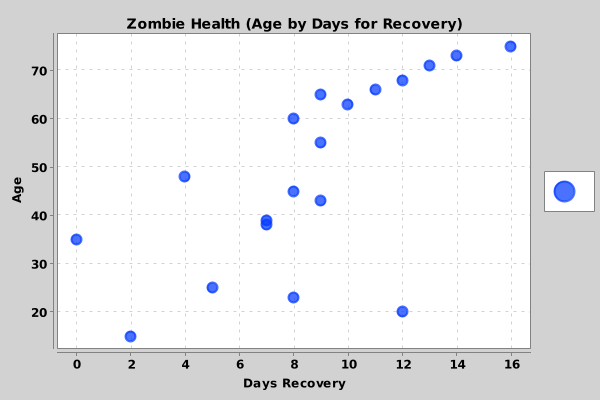

null

In [26]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");

// criando o componente de projeção
IProjection dataSetProjection = new ProjectionComponent();
dataSetProjection.setAttributes(new String[]{"days_recovery", "age"});
dataSetProjection.connect(dataset);

IChart chartElement = new ChartBubbleComponent();
chartElement.setTitle(new String("Zombie Health (Age by Days for Recovery)"));
chartElement.setXTitle(new String("Days Recovery"));
chartElement.setYTitle(new String("Age"));
chartElement.connect(dataSetProjection);

// exibindo o chart
chartElement.start();
chartElement.stop();

## Tarefa 5

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação dos zumbis, colorindo os pontos por diagnóstico, conforme exemplo abaixo.

**Recomendação:** Se você recortar uma terceira coluna com o diagnóstico, o gráfico resultante irá colorir os pontos por diagnóstico.

![Graph](example2.png)

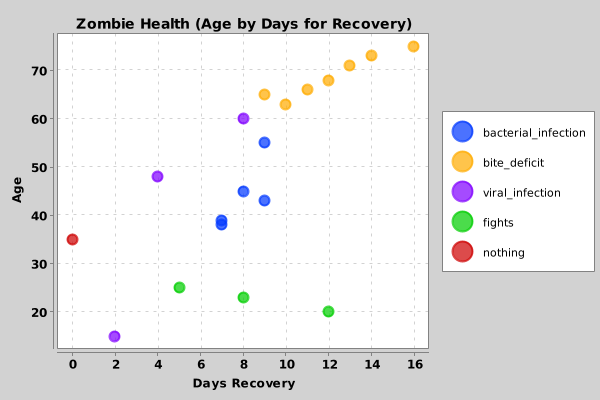

null

In [27]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");

// criando o componente de projeção
IProjection dataSetProjection = new ProjectionComponent();
dataSetProjection.setAttributes(new String[]{"days_recovery", "age", "diagnostic"});
dataSetProjection.connect(dataset);

IChart chartElement = new ChartBubbleComponent();
chartElement.setTitle(new String("Zombie Health (Age by Days for Recovery with Diagnostic)"));
chartElement.setXTitle(new String("Days Recovery"));
chartElement.setYTitle(new String("Age"));
chartElement.connect(dataSetProjection);

// exibindo o chart
chartElement.start();
chartElement.stop();

## Tarefa 6

Conecte os componentes que você achar necessários para apresentar um gráfico comparativo entre idade e tempo de recuperação, filtrando apenas a doença “bacterial_infection”.

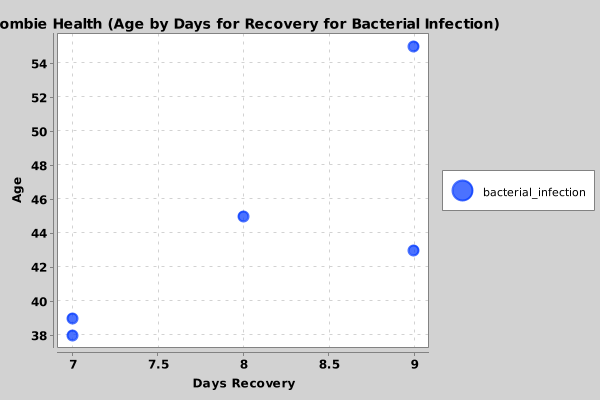

null

In [29]:
import pt.c08componentes.s20catalog.s10ds.*;
import pt.c08componentes.s20catalog.s30projection.*;
import pt.c08componentes.s20catalog.s40selection.*;
import pt.c08componentes.s20catalog.s50chart.IChart;

IDataSet dataset = new DataSetComponent();
dataset.setDataSource("../../../db/zombie/zombie-health-spreadsheet.csv");

// criando o component de seleção das informações
ISelection dataSetSelection = new SelectionComponent();
dataSetSelection.setAttribute(new String("diagnostic"));
dataSetSelection.setOperator(new String("="));
dataSetSelection.setValue(new String("bacterial_infection"));
dataSetSelection.connect(dataset);

// criando o componente de projeção
IProjection dataSetProjection = new ProjectionComponent();
dataSetProjection.setAttributes(new String[]{"days_recovery", "age", "diagnostic"});
dataSetProjection.connect(dataSetSelection);

IChart chartElement = new ChartBubbleComponent();
chartElement.setTitle(new String("Zombie Health (Age by Days for Recovery for Bacterial Infection)"));
chartElement.setXTitle(new String("Days Recovery"));
chartElement.setYTitle(new String("Age"));
chartElement.connect(dataSetProjection);

// exibindo o chart
chartElement.start();
chartElement.stop();